In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import requests
import io
import seaborn as sns

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

In [6]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
proxy_dict = {'http': 'http://10.2.176.162:8080'}
s = requests.get(url, proxies = proxy_dict).text
df = pd.read_csv(io.StringIO(s), skiprows = 3, names=[
'Country', #Name of the country.
'Ladder', #Cantril Ladder is a measure of life satisfaction.
'SD of Ladder', #Standard deviation of the ladder.
'Positive affect', #Measure of positive emotion.
'Negative affect', #Measure of negative emotion.
'Social support', #The extent to which Social support contributed to the calculation of the Happiness Score.
'Freedom', #The extent to which Freedom contributed to the calculation of the Happiness Score.
'Corruption', #The extent to which Perception of Corruption contributes to Happiness Score.
'Generosity', #The extent to which Generosity contributed to the calculation of the Happiness Score.
'Log of GDP per capita', #The extent to which GDP contributes to the calculation of the Happiness Score.
'Healthy life expectancy', #The extent to which Life expectancy contributed to the calculation of the Happiness Score.
])
df.head() #Посмотреть первые несколько рядов таблицы

,Country,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
1,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
2,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
3,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
4,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0


In [7]:
df.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
count,154.000000,154.000000,153.000000,153.000000,153.000000,153.000000,146.000000,153.000000,150.000000,148.000000
mean,79.500000,79.409091,78.594771,78.784314,78.980392,78.947712,75.472603,78.568627,77.280000,76.182432
std,44.600075,44.749647,44.866093,44.639483,44.345455,44.400953,42.338243,44.880216,43.786413,43.335432
min,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,41.250000,41.250000,40.000000,41.000000,41.000000,41.000000,39.250000,40.000000,40.250000,39.750000
50%,79.500000,79.500000,79.000000,79.000000,79.000000,79.000000,75.500000,79.000000,77.500000,76.500000
75%,117.750000,117.750000,117.000000,117.000000,117.000000,117.000000,111.750000,117.000000,114.750000,113.250000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


**Построить частотный график для двух параметров: Freedom и positive affect**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9A78115E0>]],
      dtype=object)

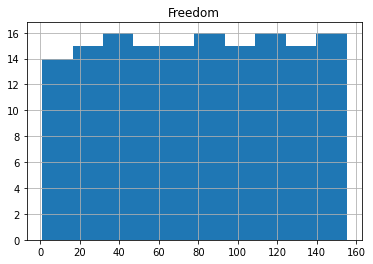

In [8]:
df.hist('Freedom')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9A99000D0>]],
      dtype=object)

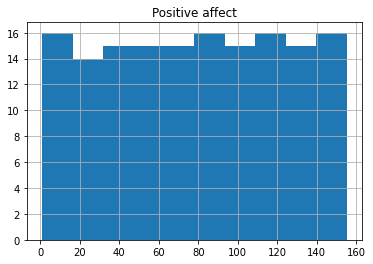

In [9]:
df.hist('Positive affect')

**Какое это распределение?**<br>
Равномерное

**Найти медиану, моду, математическое ожидание, стандартное отклонение, дисперсию, минимум и максимум,
найти выбросы (если есть), размах для колонки Freedom**

In [11]:
counts = df.Freedom.value_counts()
counts.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [12]:
# медиана
statistics.median(df.Freedom)

57.0

In [13]:
# математическое ожидание
statistics.mean(df.Freedom)

nan

In [14]:
# стандартное отклонение
statistics.pstdev(df.Freedom)

nan

In [16]:
# мода
statistics.mode(df.Freedom)

3.0

**Почему нельзя найти моду?** <br>
Модуль statistics говорит, что можно

In [21]:
# дисперсия
statistics.pvariance(df.Freedom)

nan

In [22]:
# минимум
min(df.Freedom)

1.0

In [23]:
# максимум
max(df.Freedom)

155.0

Это ведь ординальные данные, я вообще не очень понимаю, какой смысл рассматривать их под таким углом

**Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?**

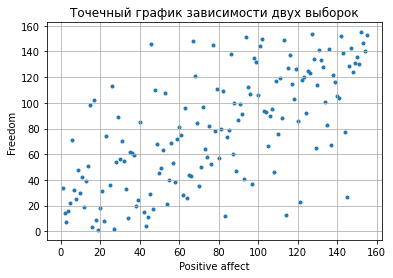

In [25]:
plt.xlabel('Positive affect')
plt.ylabel('Freedom')
plt.title('Точечный график зависимости двух выборок')
plt.grid(True)
plt.scatter(df['Positive affect'], df.Freedom, marker='.')

In [26]:
df1 = pd.read_csv('avocado.csv')
df1.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


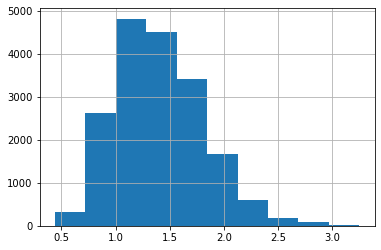

In [27]:
df1.AveragePrice.hist()

**Сделать частотный график колонки AveragePrice. Какое это распределение?** <br>
нормальное

**Найти корреляцию в следующих колонках: 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?**

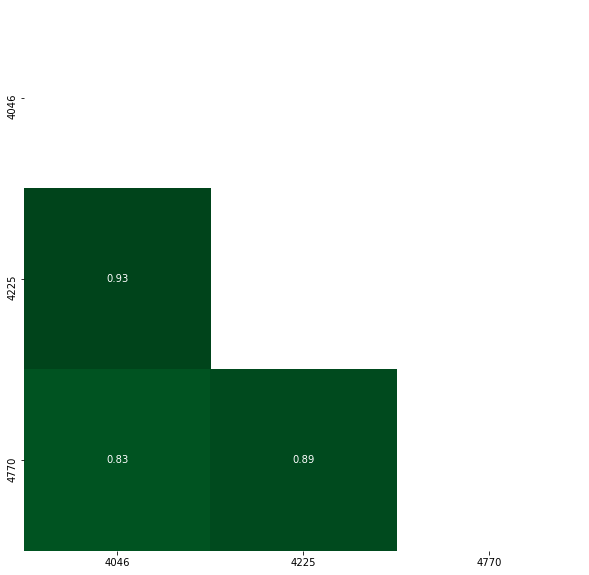

In [31]:
plt.figure(figsize=(10,10))

corr_matrix = df1[['4046','4225','4770']].corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))

sns.heatmap(lower, annot=True, fmt='.2f', cbar=False, center=0, cmap="Greens");

.Есть сильная прямая корелляция между '4046','4225' и '4770', значит мы можем предсказывать с низкой вероятностью ошибки значение одного из полей по двум другим.